<img src="numpy_logo.png" alt="Drawing" style="width: 200px;"/>

Краткий обзор инструментов, которые нужны для машинного обучения (5 мин)

# Numpy. Работа с матрицами. Векторизация.

Модуль numerical python (Numpy) для работы с матрицами. Векторизация вместо циклов. Индексация и срезы в массивах. Чтение и запись файлов с помощью Numpy.


p.s. Полезные клавиши в juputer 

- tab автодополнение
- shift+tab - документация

## Содержание

- Общая характеристика 

NumPy это фундаментальный пакет для научных вычислений с Python. Он содержит большое количество полезных особенностей:

- Мощные N-мерные объект массивов
- Сложные функции
- Инструменты для интеграции с C/C++ и Fortran кодом 
- Полезная линейная алгебра, преобразования Фурье и случайние числа 

Numpy предоставляет функции, которые позволяют оперировать многомернами массивами. 


## Установка 

http://www.numpy.org/
    
лучше устанавливать полный набор библиотеку SciPy https://www.scipy.org/install.html 
    
```
pip3 install numpy scipy matplotlib ipython jupyter pandas sympy nose
```




## Массивы 

In [41]:
import numpy as np

a = np.array([[1,2,3],[4,5,6]])
print(a)
print(a.shape)

[[1 2 3]
 [4 5 6]]
(2, 3)


In [47]:
#print(a*5-1)

print(a)
print(a.reshape((3,2)))

[[1 2 3]
 [4 5 6]]
[[1 2]
 [3 4]
 [5 6]]


In [56]:
a = np.random.rand(10)
b = np.random.rand(10)
print(a)
print(b)

[ 0.02392846  0.22046202  0.00474114  0.86980256  0.03231166  0.12494772
  0.15857799  0.69697277  0.28842934  0.87551416]
[ 0.8233139   0.03836519  0.31412525  0.17541953  0.74563505  0.76223544
  0.83037539  0.89568371  0.37175028  0.42090419]


In [65]:
a = np.array([[1,2,3],[4,5,6]])
b = np.array([[1,2],[3,4],[5,6]])
print(a)
print(b)

print(a.dot(b))

[[1 2 3]
 [4 5 6]]
[[1 2]
 [3 4]
 [5 6]]
[[22 28]
 [49 64]]


## Broadcasting 

## Indexing

In [72]:
import numpy as np

a = np.array([10,20,30,40,50,60,70,80,90])
print(a)
print(a[[2,3]])

[10 20 30 40 50 60 70 80 90]
[30 40]


In [74]:
import numpy as np

a = np.array([10,None,30,40,None,60,None,80,90])
print(a)
a[a==None] = 0
print(a)

[10 None 30 40 None 60 None 80 90]
[10 0 30 40 0 60 0 80 90]


In [76]:
a = np.array([1,2,3,-1,-4,-5,3,-5,-6,2])
#a[a<0]=0

print(a[a<0])

[-1 -4 -5 -5 -6]


In [80]:
a = np.array([1,2,3,-1,5000,-5,3000,-5,-6,2])
a[np.logical_or(a<0, a>500)] = 0
print(a)

[1 2 3 0 0 0 0 0 0 2]


In [27]:
import numpy as np
import time
N = 10000000

In [29]:
#a = np.arange(1,10)
a = np.random.rand(N)
b = np.random.rand(N)

print(a.shape)
print(b.shape)

(10000000,)
(10000000,)


$$ c = a  b $$

In [36]:
start = time.time()
c = a.dot(b)
end = time.time()
print( c, str((end-start)*1000)," ms")

2500708.1593 13.924598693847656  ms


In [35]:
start = time.time()
c = 0
for i in range(len(a)):
    c+=a[i]*b[i]
end = time.time()
print(c, str((end-start)*1000)," ms")

2500708.1593 5053.746938705444  ms


In [22]:
# Операции
import numpy as np 

A = np.array([[1,2],[3,4],[5,6]])
B = np.array([[1,1],[1,1],[1,1]])


print(A+B)
print(B+A)
print(A-B)
print(B-A)
print(A.T)
print(A*B)
print(A*2)
print(A + 2)
# print(A.dot(B))
print(A.dot(B.T))
print(A.T.dot(B))

[[2 3]
 [4 5]
 [6 7]]
[[2 3]
 [4 5]
 [6 7]]
[[0 1]
 [2 3]
 [4 5]]
[[ 0 -1]
 [-2 -3]
 [-4 -5]]
[[1 3 5]
 [2 4 6]]
[[1 2]
 [3 4]
 [5 6]]
[[ 2  4]
 [ 6  8]
 [10 12]]
[[3 4]
 [5 6]
 [7 8]]
[[ 3  3  3]
 [ 7  7  7]
 [11 11 11]]
[[ 9  9]
 [12 12]]


In [27]:
import numpy as np 
from numpy.linalg import inv
from numpy.linalg import pinv


A = np.array([[1,2],[3,4]])
A_inv = inv(A)
A_pinv = pinv(A)

In [28]:
print(A)
print(A_inv)
print(A_pinv)

[[1 2]
 [3 4]]
[[-2.   1. ]
 [ 1.5 -0.5]]
[[-2.   1. ]
 [ 1.5 -0.5]]


In [26]:
A.dot(A_inv) # ~ E

array([[  1.00000000e+00,   0.00000000e+00],
       [  8.88178420e-16,   1.00000000e+00]])

In [44]:
# зачем pinv
# https://www.quora.com/What-is-the-difference-between-pinv-and-inv

B = np.array([
    [16, 2, 3, 13],
    [5, 11, 10, 8],
    [9, 7, 6, 12],
    [4, 14, 15, 1]]
)

print(B)
print(np.linalg.matrix_rank(B))
print(inv(B))
print(pinv(B))

print(B.dot(inv(B)).dot(B))
print(B.dot(pinv(B)).dot(B))

[[16  2  3 13]
 [ 5 11 10  8]
 [ 9  7  6 12]
 [ 4 14 15  1]]
3
[[  9.38249922e+13   2.81474977e+14  -2.81474977e+14  -9.38249922e+13]
 [  2.81474977e+14   8.44424930e+14  -8.44424930e+14  -2.81474977e+14]
 [ -2.81474977e+14  -8.44424930e+14   8.44424930e+14   2.81474977e+14]
 [ -9.38249922e+13  -2.81474977e+14   2.81474977e+14   9.38249922e+13]]
[[ 0.10110294 -0.07389706 -0.06139706  0.06360294]
 [-0.03639706  0.03860294  0.02610294  0.00110294]
 [ 0.01360294 -0.01139706 -0.02389706  0.05110294]
 [-0.04889706  0.07610294  0.08860294 -0.08639706]]
[[ 16.         2.         3.        13.      ]
 [  7.5       17.75      15.375     14.625   ]
 [ 11.5        5.5        5.5       11.5     ]
 [ 10.0625    16.96875   18.234375   6.265625]]
[[ 16.   2.   3.  13.]
 [  5.  11.  10.   8.]
 [  9.   7.   6.  12.]
 [  4.  14.  15.   1.]]


In [81]:
import pandas as pd 

In [50]:
import numpy as np

d = np.diag([1,2,3,4])
print(d)

E = np.eye(5)
print(E)

Z=np.zeros((2,3))
print(Z)

[[1 0 0 0]
 [0 2 0 0]
 [0 0 3 0]
 [0 0 0 4]]
[[ 1.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.]
 [ 0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  1.]]
[[ 0.  0.  0.]
 [ 0.  0.  0.]]


$$
\omega = (X^TX+\alpha I)^{-1} X^T y
$$

http://eli.thegreenplace.net/2014/derivation-of-the-normal-equation-for-linear-regression


Считывание csv файлов в numpy массив, преобразование типов (10 мин)

Срезы, индексация элементов (15 мин)

Изменение размеров матриц, добавление строк, столбцов

Векторизация. Примеры. Измерение времени работы. Пример с регрессией (без обучения, просто вычисление) (15 мин)


CSV

http://www.machinelearning.ru/wiki/index.php?title=%D0%9B%D0%B8%D0%BD%D0%B5%D0%B9%D0%BD%D0%B0%D1%8F_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%B8%D1%8F_(%D0%BF%D1%80%D0%B8%D0%BC%D0%B5%D1%80)

https://www.kaggle.com/andonians/random-linear-regression

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
from numpy import genfromtxt
my_data = genfromtxt('test.csv', delimiter=',', skip_header=True)
my_data.shape
print(my_data.dtype)

float64


In [117]:
my_data[:1].shape

(1, 2)

$$
\omega = (X^TX)^{-1}X^Ty
$$

In [87]:
X = my_data[:,0]
X=X.reshape((len(X),1))
X=X.T
y = my_data[:,1]


In [85]:
from numpy.linalg import pinv

X = my_data[:,0]
X=X.reshape((len(X),1))
X=X.T
y = my_data[:,1]
y=y.reshape((len(y),1))

print(X.shape)
print(y.shape)

p = pinv(X.T.dot(X)).dot(X.T)
print(p.shape)
w=p.T.dot(y)

#print(w,y.shape)
#plt.figure(figsize=(16, 8))
#plt.scatter(my_data[:,0], my_data[:,1])
#plt.plot([0,100],[1,50], c="r")
#plt.show()

#%matplotlib inline



(1, 300)
(300, 1)
(300, 1)


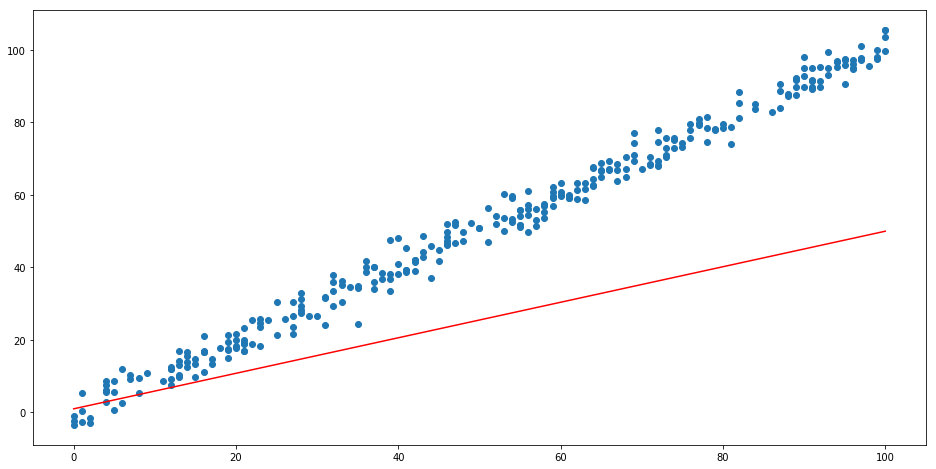

In [62]:
plt.figure(figsize=(16, 8))
plt.scatter(my_data[:,0], my_data[:,1])
plt.plot([0,100],[1,50], c="r")
plt.show()